## K Nearest Neighbors

In [1]:
import pprint
import numpy as np
import pandas as pd
import knn_images
from IPython.display import display as disp
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
def normalize(lst):
    s = sum(lst)
    return map(lambda x: float(x)/s, lst)


def get_train_data(numBatches):
    train_data = []
    train_labels = []
    file = "cifar-10-batches-py/data_batch_" + str(numBatches)
    batch_data_2 = knn_images.unpickle(file)
    train_data = batch_data_2[b'data']
    train_labels = batch_data_2[b'labels']

    for i in range(1,numBatches):
        file = "cifar-10-batches-py/data_batch_" + str(i)
        batch_data = knn_images.unpickle(file)
        data = batch_data[b'data']
        labels = batch_data[b'labels']
        
        train_data = np.concatenate((train_data, data),0)
        train_labels= np.concatenate((train_labels, labels),0)
        
    return train_data, train_labels

def get_test_data():
    file = "cifar-10-batches-py/test_batch"
    test_batch = knn_images.unpickle(file)
    test_data = test_batch[b'data']
    test_labels = test_batch[b'labels']
    
    return test_data, test_labels



In [47]:
# retrieve train_data, train_labels
train_data, train_labels = get_train_data(5)
test_data, test_labels = get_test_data()

train_labels = train_labels[:1000]
train_data = train_data[:1000]

test_labels = test_labels[:200]
test_data = test_data[:200]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_data)
# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
# test_data = scaler.transform(test_data)
temp_data = list(range(len(test_data)))
for i in range(len(test_data)):
    temp_data[i] = test_data[i]/255.0
print(temp_data)
# from sklearn.decomposition import PCA
# # Make an instance of the Model
# pca = PCA(.95)
# pca.fit(train_data)
# train_data = pca.transform(train_data)
# test_data = pca.transform(test_data)
# # # normalize data
# # norm_data = []
# # for i in test_data:
# #     norm_data.append(i/max(i))
    
# # test_data = norm_data

# # norm_data = []
# # for i in train_data:
# #     norm_data.append(i/max(i))
# # train_data = norm_data



/Users/Hadi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[array([0.61960784, 0.62352941, 0.64705882, ..., 0.48627451, 0.50588235,
       0.43137255]), array([0.92156863, 0.90588235, 0.90980392, ..., 0.69803922, 0.74901961,
       0.78039216]), array([0.61960784, 0.61960784, 0.54509804, ..., 0.03137255, 0.01176471,
       0.02745098]), array([0.60784314, 0.65490196, 0.69019608, ..., 0.19607843, 0.20392157,
       0.19607843]), array([0.25490196, 0.2745098 , 0.18823529, ..., 0.53333333, 0.57254902,
       0.45882353]), array([0.70196078, 0.54509804, 0.30196078, ..., 0.29803922, 0.30980392,
       0.28627451]), array([0.62745098, 0.7254902 , 0.81960784, ..., 0.12156863, 0.13333333,
       0.10980392]), array([0.3254902 , 0.32156863, 0.31764706, ..., 0.08627451, 0.09411765,
       0.08627451]), array([0.09019608, 0.0745098 , 0.08235294, ..., 0.4627451 , 0.48235294,
       0.4627451 ]), array([0.85098039, 0.82352941, 0.80392157, ..., 0.8       , 0.88235294,
       0.8745098 ]), array([0.35294118, 0.35294118, 0.35686275, ..., 0.58039216, 0.5725490

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def fit_knn(train_data, train_labels, k):
    knn = KNeighborsClassifier()
    knn.fit(train_data,train_labels) #fit data in classifier
    return knn

#retrieve knn model with specified number of k
knn = fit_knn(train_data, train_labels, 10)

ValueError: Found input variables with inconsistent numbers of samples: [200, 1000]

In [50]:
import time

start = time.time()
pred_labels = knn.predict(test_data)
print("time: " + str(time.time()-start))

time: 2.3098092079162598


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(test_labels, pred_labels))  
print(classification_report(test_labels, pred_labels))  


[[20  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0]
 [19  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0]
 [25  0  0  0  0  1  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0]
 [28  0  0  0  0  0  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0]]
             precision    recall  f1-score   support

          0       0.10      1.00      0.18        20
          1       0.00      0.00      0.00        14
          2       0.00      0.00      0.00        21
          3       0.00      0.00      0.00        19
          4       0.00      0.00      0.00        15
          5       0.00      0.00      0.00        18
          6       0.00      0.00      0.00        26
          7       0.00      0.00      0.00        18
          8       0.00      0.00      0.00        28
          9       0.00      0.00      0.00        21

avg / total       0.01      0.10      0.02       200



/Users/Hadi/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:

## CROSS VALIDATION
from sklearn.model_selection import GridSearchCV
def cross_val(a,b):
    #create new a knn model
    knn2 = KNeighborsClassifier()
    #create a dictionary of all values we want to test for n_neighbors 
    param_grid = {'n_neighbors': np.arange(a,b)}
    #use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
    #fit model to data
    knn_gscv.fit(train_data,train_labels)
    #check top performing n_neighbors value
    k = knn_gscv.best_params_['n_neighbors']
    
    knn = fit_knn(train_data, train_labels, k)
    pred_labels = knn.predict(test_data)
    print(confusion_matrix(test_labels, pred_labels))  
    print(classification_report(test_labels, pred_labels))
    conf = confusion_matrix(test_labels, pred_labels)
    clas_rep = classification_report(test_labels, pred_labels)
    f = open('report.txt', 'a')
    f.write("\nSTEP 4: \n")
    f.write(str(conf))
    f.write("\n\n")
    f.write(str(clas_rep))
    f.write("\n\n")
    f.close()


    return k

k = cross_val(5,15)
print(k)

[[ 9  0  1  0  5  0  0  0  2  3]
 [ 0  3  2  1  1  0  1  1  4  1]
 [ 2  0  4  0  8  1  4  1  1  0]
 [ 2  0  4  0  4  4  3  1  1  0]
 [ 0  0  2  1  9  0  1  0  1  1]
 [ 1  1  3  1  8  0  1  2  1  0]
 [ 2  0  5  1 10  0  8  0  0  0]
 [ 4  2  1  0  5  1  1  4  0  0]
 [ 4  1  0  2  4  1  1  0 12  3]
 [ 6  0  0  1  4  0  0  1  7  2]]
             precision    recall  f1-score   support

          0       0.30      0.45      0.36        20
          1       0.43      0.21      0.29        14
          2       0.18      0.19      0.19        21
          3       0.00      0.00      0.00        19
          4       0.16      0.60      0.25        15
          5       0.00      0.00      0.00        18
          6       0.40      0.31      0.35        26
          7       0.40      0.22      0.29        18
          8       0.41      0.43      0.42        28
          9       0.20      0.10      0.13        21

avg / total       0.26      0.26      0.24       200

13


## SVM

In [13]:
# changes the labels to apply binary classification (1 vs 0)

def binary_labels(labels, target):
    return [1 if label == target else 0 for label in labels]

In [14]:
#svm
# from sklearn.svm import SVC
from sklearn.svm import LinearSVC

def predict_svm(train,test):
    train_data,train_labels = train
    test_data,test_labels = test
    # 10 svms to predict each class 1vsALL
    svms = [LinearSVC(C=4) for i in range(10)]
    # fit 10 models
    svms = [svms[i].fit(train_data,binary_labels(train_labels,i)) for i in range(10)]
    # should return list of lists, where predictions[5] = labels predicted for class 5 ...
    print("Now predicting!")
    preds = [svms[i].predict(test_data) for i in range(10)]
    return preds

def svm_acc(preds, test_labels):
    acc = 0
    for i in range(len(test_labels)):
        label = test_labels[i]
        svm_label = preds[label]
        if svm_label[i] == 1:
            acc += 1
    return acc/len(test_labels)

def convert_predictions(preds):
    tot_preds = list(range(len(preds[0])))
    for i in range(len(preds)):
        pred = preds[i]
        for j in range(len(pred)):
            if pred[j] == 1:
                tot_preds[j] = i
    return tot_preds

In [33]:
# #grab data
# train_data, train_labels = get_train_data(5)
# test_data, test_labels = get_test_data()
# #slice labels

train_labels = train_labels[:1000]
train_data = train_data[:1000]

test_labels = test_labels[:200]
test_data = test_data[:200]
# #convert binary labels

In [34]:
import time
start = time.time()
preds = predict_svm((train_data,train_labels),(test_data,test_labels))
print("time: " + str(time.time()-start))

acc = svm_acc(preds, test_labels)
print(acc)

Now predicting!
time: 119.7089672088623
0.205


In [35]:
svm_preds = convert_predictions(preds)
import random

svm_preds = [random.randint(0,9) if p > 9 else p for p in svm_preds]

conf = confusion_matrix(test_labels, pred_labels)
clas_rep = classification_report(test_labels, pred_labels)
print(conf)
print(clas_rep)
# f = open('report.txt', 'a')
# f.write("\nSTEP 4: \n")
# f.write(str(conf))
# f.write("\n\n")
# f.write(str(clas_rep))
# f.write("\n\n")
# f.close()

[[ 9  0  1  0  5  0  0  0  2  3]
 [ 0  3  2  1  1  0  1  1  4  1]
 [ 2  0  4  0  8  1  4  1  1  0]
 [ 2  0  4  0  4  4  3  1  1  0]
 [ 0  0  2  1  9  0  1  0  1  1]
 [ 1  1  3  1  8  0  1  2  1  0]
 [ 2  0  5  1 10  0  8  0  0  0]
 [ 4  2  1  0  5  1  1  4  0  0]
 [ 4  1  0  2  4  1  1  0 12  3]
 [ 6  0  0  1  4  0  0  1  7  2]]
             precision    recall  f1-score   support

          0       0.30      0.45      0.36        20
          1       0.43      0.21      0.29        14
          2       0.18      0.19      0.19        21
          3       0.00      0.00      0.00        19
          4       0.16      0.60      0.25        15
          5       0.00      0.00      0.00        18
          6       0.40      0.31      0.35        26
          7       0.40      0.22      0.29        18
          8       0.41      0.43      0.42        28
          9       0.20      0.10      0.13        21

avg / total       0.26      0.26      0.24       200



In [ ]:
print(confusion_matrix(test_labels,svm_preds))  

In [48]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

clf = LinearSVC()
scores = cross_val_score(clf, train_data[:1000], train_labels[:1000], cv=5)
print(scores)


[0.20197044 0.27722772 0.21393035 0.23115578 0.16923077]


[[ 9  0  1  0  5  0  0  0  2  3]
 [ 0  3  2  1  1  0  1  1  4  1]
 [ 2  0  4  0  8  1  4  1  1  0]
 [ 2  0  4  0  4  4  3  1  1  0]
 [ 0  0  2  1  9  0  1  0  1  1]
 [ 1  1  3  1  8  0  1  2  1  0]
 [ 2  0  5  1 10  0  8  0  0  0]
 [ 4  2  1  0  5  1  1  4  0  0]
 [ 4  1  0  2  4  1  1  0 12  3]
 [ 6  0  0  1  4  0  0  1  7  2]]


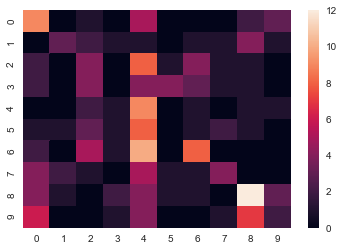